In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from bs4 import BeautifulSoup
import requests
import dateutil.parser

def to_date(datestring):
    date = dateutil.parser.parse(datestring)
    return date

def money_to_int(moneystring):
    moneystring = moneystring.replace('$', '').replace(',', '')
    return int(moneystring)
def money_to_int_null(moneystring):
    if moneystring != '-':
        moneystring = moneystring.replace('$', '').replace(',', '')
    else:
        moneystring = moneystring.replace('-', '0')
    return int(moneystring)
def percent_float(string):
    if string == '-':
        string = string.replace('-', '0')
#     if '<>' in string:
#         string = string.replace('<>', '')
    else:
        string.replace('%<>', '')
    return float(string)
def null_replace(string):
    if string == '-':
        string = string.replace('-', '0')
    return int(string)

In [2]:
all_data = pd.read_csv('Movies_and_CDC_Data.csv')

/Users/alexstake/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (2,10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [35]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484115 entries, 0 to 484114
Data columns (total 80 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Date                                    484115 non-null  object 
 1   rank                                    484115 non-null  int64  
 2   rank_yest                               484115 non-null  object 
 3   movie_title                             484115 non-null  object 
 4   daily_gross                             484115 non-null  int64  
 5   gross_change_day                        484115 non-null  object 
 6   gross_change_week                       484115 non-null  object 
 7   num_of_theaters                         484115 non-null  object 
 8   avg_gross_per_theater                   484115 non-null  int64  
 9   gross_to_date                           484115 non-null  int64  
 10  days_in_release                         4841

In [15]:
all_data['daily_gross'] = all_data.daily_gross.apply(money_to_int)

AttributeError: 'int' object has no attribute 'replace'

In [16]:
all_data['gross_to_date'] = all_data.gross_to_date.apply(money_to_int)

AttributeError: 'int' object has no attribute 'replace'

In [28]:
all_data.head(40)

,Date,rank,rank_yest,movie_title,daily_gross,gross_change_day,gross_change_week,num_of_theaters,avg_gross_per_theater,gross_to_date,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
0,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,1052663,48,22278,269897,251096,9,21221,3505,3522,14194
1,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,398071,208,22772,121310,121462,96,15478,7502,5656,2320
2,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,741516,4,15471,131339,156098,1,21824,8047,7616,6161
3,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,2837203,4275,85659,770432,838271,2189,149663,74156,48994,26513
4,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,394131,41,14191,94227,115338,21,21832,10710,8954,2168
5,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,617942,298,16502,193819,167354,146,22663,11795,5342,5526
6,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,119,1,1024,2085,7,0,62,0,62,0
7,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,5946069,26785,196656,1835579,1721891,16612,175550,90206,51298,34046
8,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,1897379,2825,52408,410229,401379,797,78765,41353,30655,6757
9,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,"4,070",360,181833064,...,16146,0,25,1055,1476,0,0,0,0,0


In [17]:
all_data['avg_gross_per_theater'] = all_data.avg_gross_per_theater.apply(money_to_int_null)

AttributeError: 'int' object has no attribute 'replace'

In [55]:
all_data['num_of_theaters'] =all_data.num_of_theaters.apply(money_to_int_null)
all_data.info()
all_data['days_in_release'] =all_data.days_in_release.astype(int)
all_data.info()

AttributeError: 'int' object has no attribute 'replace'

In [62]:
all_data['days_in_release'] =all_data.days_in_release.apply(null_replace)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484115 entries, 0 to 484114
Data columns (total 80 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Date                                    484115 non-null  object 
 1   rank                                    484115 non-null  int64  
 2   rank_yest                               484115 non-null  object 
 3   movie_title                             484115 non-null  object 
 4   daily_gross                             484115 non-null  int64  
 5   gross_change_day                        484115 non-null  object 
 6   gross_change_week                       484115 non-null  object 
 7   num_of_theaters                         484115 non-null  int64  
 8   avg_gross_per_theater                   484115 non-null  int64  
 9   gross_to_date                           484115 non-null  int64  
 10  days_in_release                         4841

In [63]:
all_data_no_loc = all_data.drop(columns = 'Location')
combined_vax = all_data_no_loc.groupby(['Date', 'MMWR_week', 'movie_title', 'daily_gross', 'gross_change_day', 'avg_gross_per_theater', 'days_in_release', 'distributor'], as_index=False)[['Date', 'daily_gross', 'gross_change_day', 'avg_gross_per_theater', 'days_in_release', 'distributor', 'Series_Complete_Yes', 'gross_to_date']].sum()
all_data_no_loc.head()

,Date,rank,rank_yest,movie_title,daily_gross,gross_change_day,gross_change_week,num_of_theaters,avg_gross_per_theater,gross_to_date,...,Series_Complete_Pfizer_18Plus,Series_Complete_Unk_Manuf_18Plus,Series_Complete_Janssen_65Plus,Series_Complete_Moderna_65Plus,Series_Complete_Pfizer_65Plus,Series_Complete_Unk_Manuf_65Plus,Series_Complete_FedLTC,Series_Complete_FedLTC_Residents,Series_Complete_FedLTC_Staff,Series_Complete_FedLTC_Unknown
0,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,4070,360,181833064,...,1052663,48,22278,269897,251096,9,21221,3505,3522,14194
1,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,4070,360,181833064,...,398071,208,22772,121310,121462,96,15478,7502,5656,2320
2,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,4070,360,181833064,...,741516,4,15471,131339,156098,1,21824,8047,7616,6161
3,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,4070,360,181833064,...,2837203,4275,85659,770432,838271,2189,149663,74156,48994,26513
4,2021-09-22,1,1,Shang-Chi and the Legend of the Ten Rings,1467643,-25.2%,-40.5%,4070,360,181833064,...,394131,41,14191,94227,115338,21,21832,10710,8954,2168


In [64]:
combined_vax.tail(10)

,Date,MMWR_week,movie_title,gross_change_day,distributor,daily_gross,avg_gross_per_theater,days_in_release,Series_Complete_Yes,gross_to_date
7466,2021-09-22,38,The Boss Baby: Family Business,+47.5%,Universal Pictures,209950,520,5395,369355907,3716851450
7467,2021-09-22,38,The Card Counter,-18.1%,Focus Features,3542500,6045,845,369355907,133932500
7468,2021-09-22,38,The Eyes of Tammy Faye,-19.3%,Searchlight Pictures,3978455,8840,390,369355907,55492515
7469,2021-09-22,38,The Forever Purge,-52.3%,Universal Pictures,16575,65,5395,369355907,2894282300
7470,2021-09-22,38,The Ladykillers2021 Re-release,-,Rialto Pictures,11375,11375,7215,369355907,1508845
7471,2021-09-22,38,The Night House,-13.2%,Searchlight Pictures,614770,2925,2210,369355907,452572640
7472,2021-09-22,38,The Nowhere Inn,+5.3%,IFC Films,164125,3510,390,369355907,1716455
7473,2021-09-22,38,The Protege,-18%,Lionsgate,423930,2730,2210,369355907,483623920
7474,2021-09-22,38,Together,+39.2%,Universal Pictures,8775,585,1755,369355907,13932035
7475,2021-09-22,38,Who You Think I Am,+62.3%,Cohen Media Group,36920,3640,1300,369355907,2261155


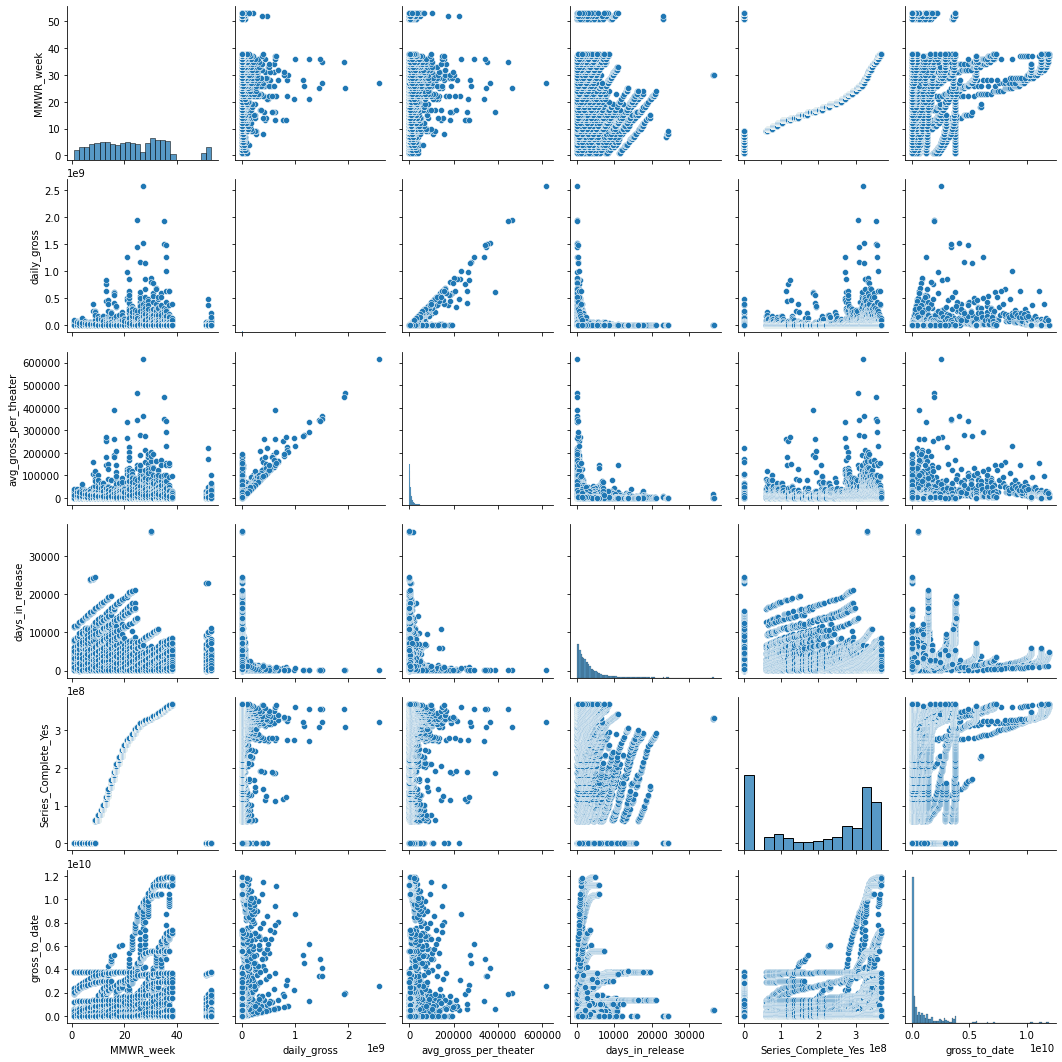

In [65]:
sns.pairplot(combined_vax);